# !!!Note

ID, Gender, Customer Type, Age, Type of Travel, flight distant,Baggage handling,Gate location,
Online support,Ease of Online booking,Online boarding

These columns are not in use

Need to explain why online related columns are not added

### Problem Definition:
How different variables determine if the customer is satisfy/dissatisfy with the service provided by America Airline. 


### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [61]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset on US Airline passenger satisfaction survey : Attached file `satisfaction_v2.csv`     

In [62]:
satisfactionData = pd.read_csv('satisfaction.csv')
satisfactionData.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [63]:
satisfactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

Let's list down all our observations from the super-quick glance of the dataset, as above.
* There are `24` variables/features/columns and `129880` observations/samples/rows in the dataset.   
* The response variable seems to be `satisfaction_v2`, while the remaining 18 are most likely predictors. Except ID, Gender, Customer Type, Age and Type of Travel.     
* There are `16` variables identified as `int64` by default, and it seems they are indeed Numeric.
* There are `1` variables identified as `float64` by default, and it seems they are indeed Numeric.
* There are `1` variables identified as `object` by default, and they are most likely Categorical.  
* None of the variables/features seem to have any missing value.

---
## Exploratory Data Analysis

Let us start by exploring the response variable `satisfaction_v2`, the one we are supposed to predict at the end of the day.

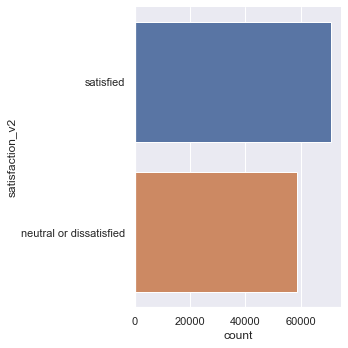

In [64]:
sb.catplot(y = 'satisfaction_v2', data = satisfactionData, kind = "count")

In [65]:
countG, countB = satisfactionData['satisfaction_v2'].value_counts()
print("Ratio of classes is satisfied : neutral or dissatisfied = ", countG, ":", countB)

Ratio of classes is satisfied : neutral or dissatisfied =  71087 : 58793


##### Quickly check out the Numeric and Categorical predictors

In [66]:
# Numeric Predictors
satisfactionData[['Seat comfort','Departure/Arrival time convenient',
                  'Food and drink','Inflight wifi service','Inflight entertainment',
                  'On-board service','Leg room service','Checkin service','Cleanliness',
                 'Departure Delay in Minutes','Arrival Delay in Minutes',]].describe()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,On-board service,Leg room service,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,2.838597,2.990645,2.851994,3.249130,3.383477,3.465075,3.485902,3.340807,3.705759,14.713713,15.091129
std,1.392983,1.527224,1.443729,1.318818,1.346059,1.270836,1.292226,1.260582,1.151774,38.071126,38.465650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,12.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


##### We found out that there are null value for "Arrival Delay in Minutes", we decide to replace null with 0.

In [67]:
cleanArrivalDelay = pd.DataFrame(satisfactionData[['Arrival Delay in Minutes']])
cleanArrivalDelay = cleanArrivalDelay['Arrival Delay in Minutes'].fillna(0)

cleanArrivalDelay.describe() #count has now updated from 129487 to 129880

count    129880.000000
mean         15.045465
std          38.416353
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

##### Also did a check on the ID to ensure that they are all unique.

In [68]:
# IDs of Satisfaction Data in the Dataset
print("Unique IDs of Satisfaction Data :", len(satisfactionData["id"].unique()))

Unique IDs of Satisfaction Data : 129880


##### Categorical Predictors

In [69]:
# Categorical Predictors
satisfactionData['Class'].describe()

count       129880
unique           3
top       Business
freq         62160
Name: Class, dtype: object

#### Analysing the Variable


* {"Seat comfort","Departure/Arrival time convenient","Food and drink","Inflight wifi service","Inflight entertainment", "On-board service", "Leg room service", "Checkin service","Cleanliness","Online boarding"} has 5 levels, 0 as lowest and 5 being the highest.

* {"Departure Delay in Minutes","Arrival Delay in Minutes"} are in minutes. Both have 0 as the lowest ,1592 and 1584 as the highest respectively.



### Predictors corresponding to the Satisfaction Data

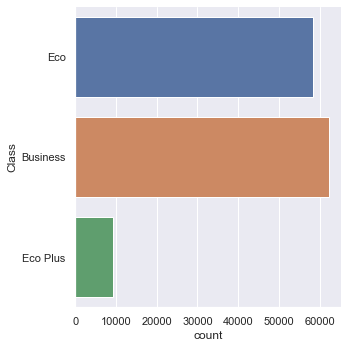

In [70]:
# Flight Class
sb.catplot(y = 'Class', data = satisfactionData, kind = "count")

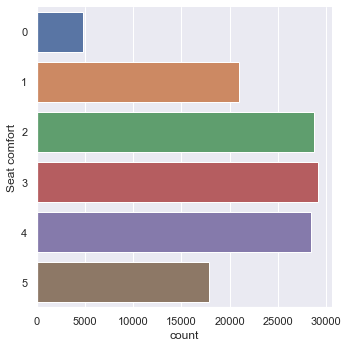

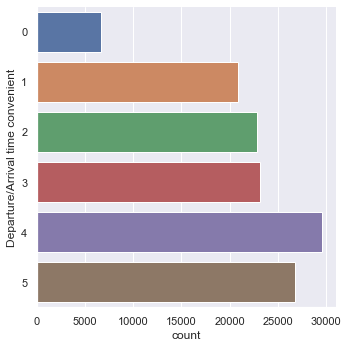

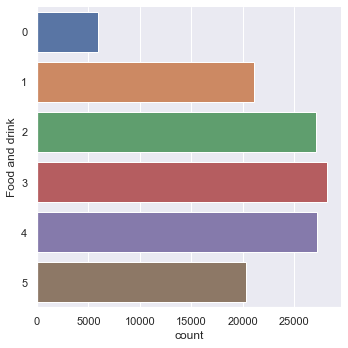

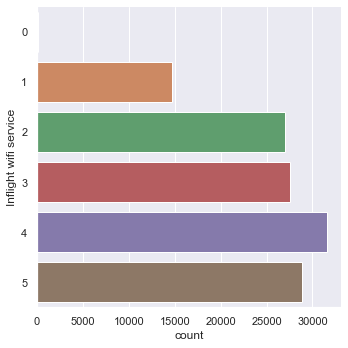

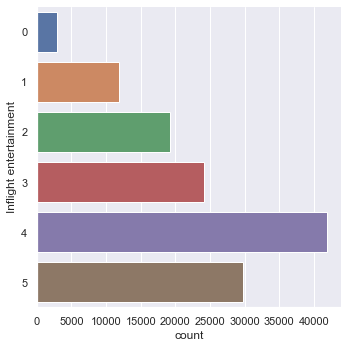

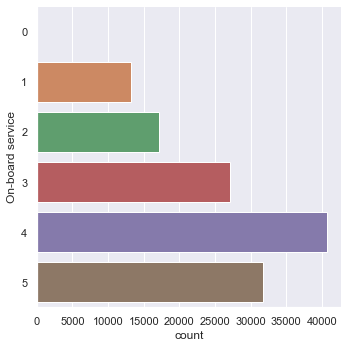

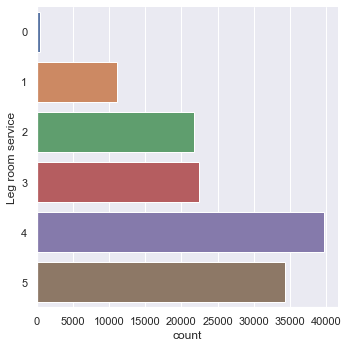

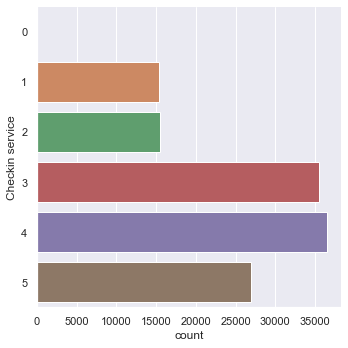

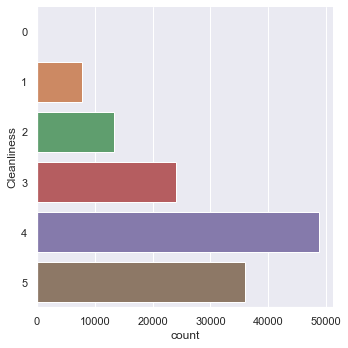

In [71]:
# list of columns ['Seat comfort','Departure/Arrival time convenient','Food and drink',
#'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
#'Checkin service','Cleanliness']

sb.catplot(y = 'Seat comfort', data = satisfactionData, kind = "count")
sb.catplot(y = 'Departure/Arrival time convenient', data = satisfactionData, kind = "count")
sb.catplot(y = 'Food and drink', data = satisfactionData, kind = "count")
sb.catplot(y = 'Inflight wifi service', data = satisfactionData, kind = "count")
sb.catplot(y = 'Inflight entertainment', data = satisfactionData, kind = "count")
sb.catplot(y = 'On-board service', data = satisfactionData, kind = "count")
sb.catplot(y = 'Leg room service', data = satisfactionData, kind = "count")
sb.catplot(y = 'Checkin service', data = satisfactionData, kind = "count")
sb.catplot(y = 'Cleanliness', data = satisfactionData, kind = "count")

Observation from the distribution:

* The majority of the data distributes among grade 3 & 4.

* At first glance of the graph, some variables seem to show that the '0' grade is empty. However, after looking into the raw data, we observed that this is due to the small size of the data that is grade '0'. Subsequently, we can observe that the '0' grade tend to have the smallest distribution.


### Relationship with Satisfaction Data

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='satisfaction_v2'>

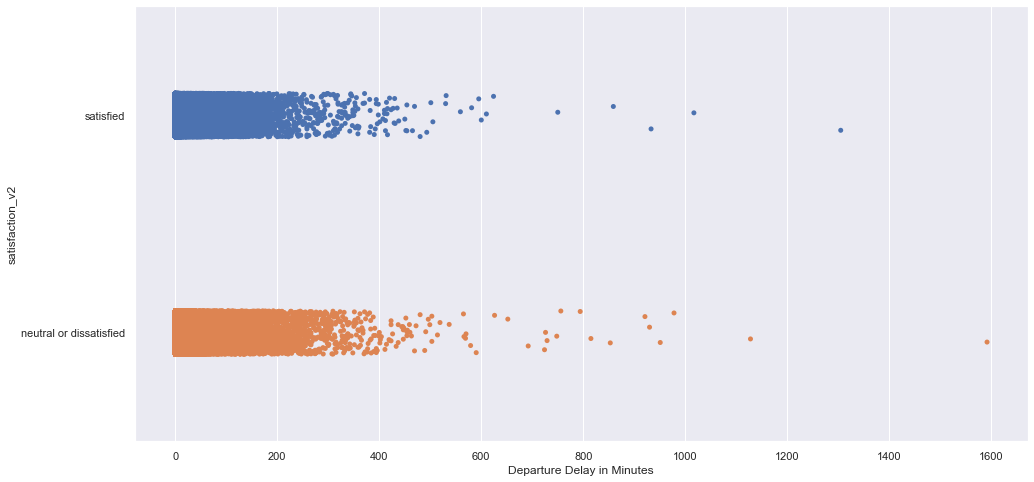

In [72]:
# satisfaction_v2 vs Departure Delay in Minutes
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Departure Delay in Minutes', y = 'satisfaction_v2', data = satisfactionData)

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='satisfaction_v2'>

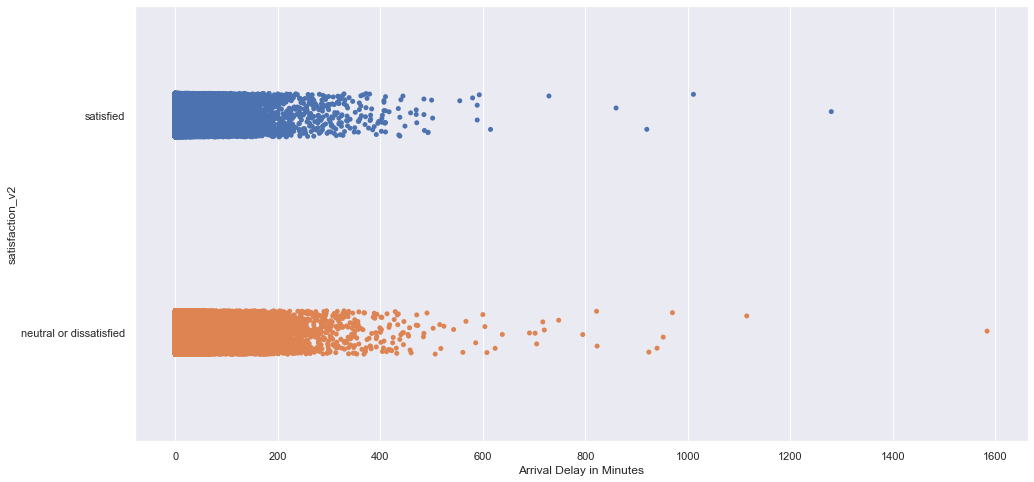

In [73]:
# satisfaction_v2 vs Arrival Delay in Minutes
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Arrival Delay in Minutes', y = 'satisfaction_v2', data = satisfactionData)

<AxesSubplot:xlabel='Seat comfort', ylabel='satisfaction_v2'>

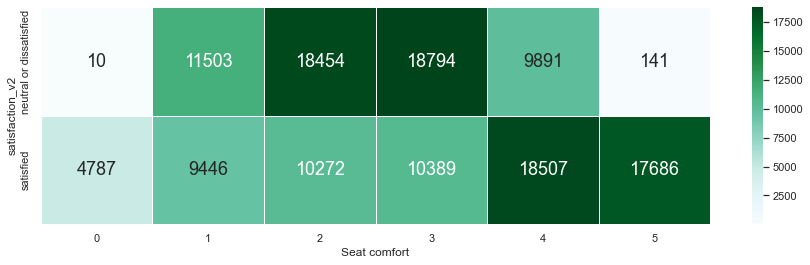

In [74]:
# satisfaction_v2 vs Seat comfort
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Seat comfort']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Note - Seat comfort

Neutral or dissatisfied is distributed on 2 & 3.
While "satisfied" is focusing more on grading 4 & 5 which shows on Inflight entertainment is one of the main factor that contributes to satisfied

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='satisfaction_v2'>

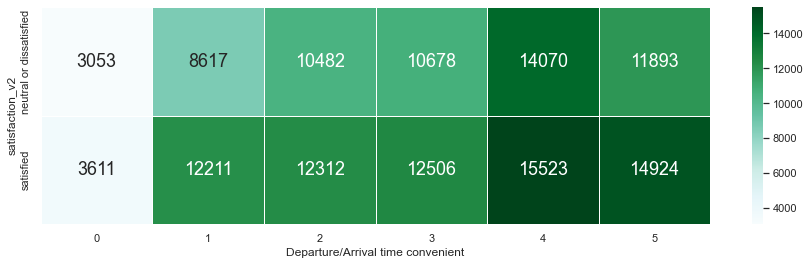

In [75]:
# satisfaction_v2 vs Departure/Arrival time convenient
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Departure/Arrival time convenient']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Food and drink', ylabel='satisfaction_v2'>

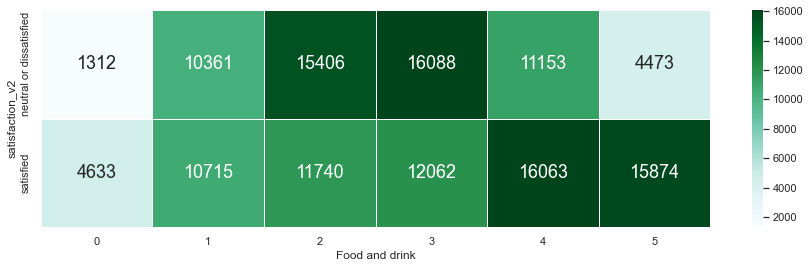

In [76]:
# satisfaction_v2 vs Food and drink
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Food and drink']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Note - Food and Drink

Slight relation base on the distribution

<AxesSubplot:xlabel='Inflight wifi service', ylabel='satisfaction_v2'>

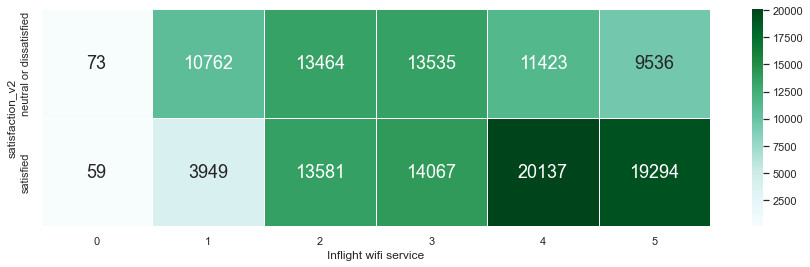

In [77]:
# satisfaction_v2 vs Inflight wifi service
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Inflight wifi service']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Inflight entertainment', ylabel='satisfaction_v2'>

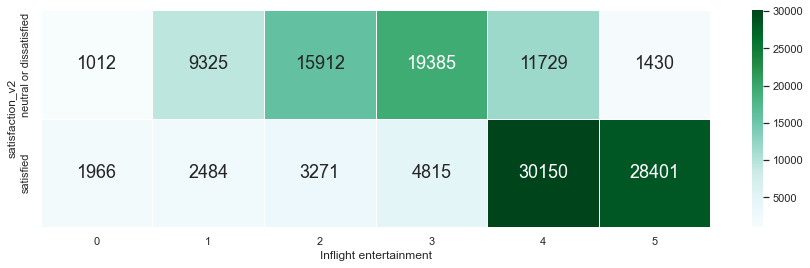

In [78]:
# satisfaction_v2 vs Inflight entertainment
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Inflight entertainment']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Note - Inflight entertainment

Neutral or dissatisfied is distributed on 2 & 3.
While "satisfied" is focusing more on grading 4 & 5 which shows on Inflight entertainment is one of the main factor that contributes to satisfied

<AxesSubplot:xlabel='On-board service', ylabel='satisfaction_v2'>

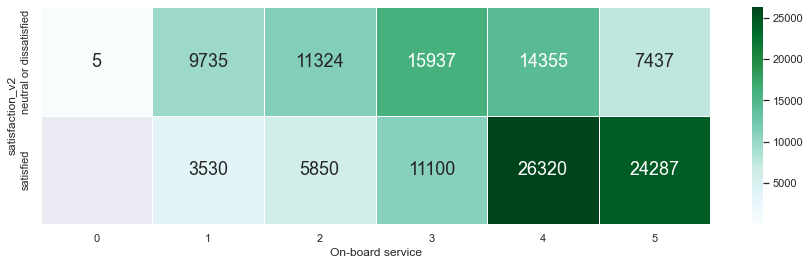

In [79]:
# satisfaction_v2 vs On-board service
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'On-board service']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Note - On-board service

Neutral or dissatisfied is distributed evenly which hard to predicted the satifaction
While "satisfied" is focusing more on grading 4 & 5 which shows on board service is one of the main factor that contributes to satisfied

<AxesSubplot:xlabel='Leg room service', ylabel='satisfaction_v2'>

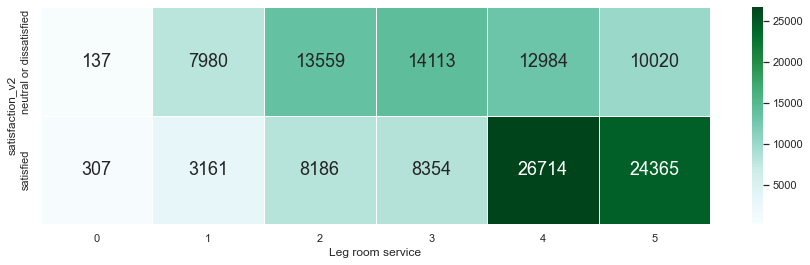

In [80]:
# satisfaction_v2 vs Leg room service
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Leg room service']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Checkin service', ylabel='satisfaction_v2'>

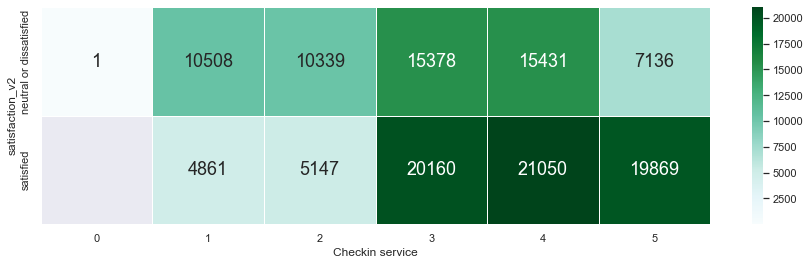

In [81]:
# satisfaction_v2 vs Checkin service
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Checkin service']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Cleanliness', ylabel='satisfaction_v2'>

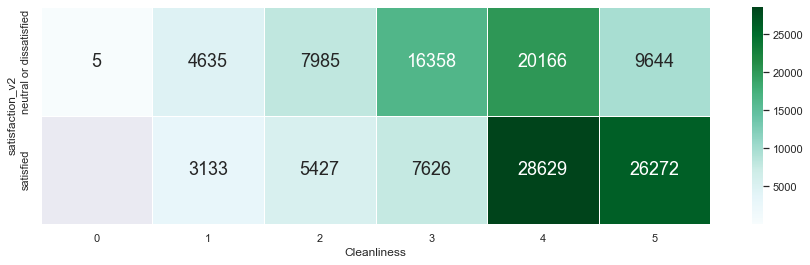

In [82]:
# satisfaction_v2 vs Cleanliness
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Cleanliness']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Class', ylabel='satisfaction_v2'>

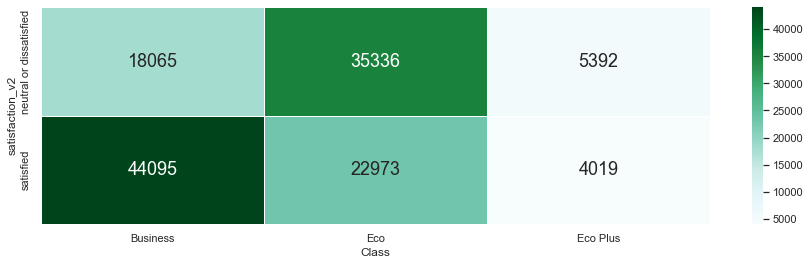

In [83]:
# satisfaction_v2 vs Class
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Class']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Note - Class

Business class has higher satisfied rate

## Creating a Model for satisfaction_v2 : Attempt Test

In [96]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
ohe = OneHotEncoder()

#test 
oe = OrdinalEncoder()
satisfactionData_num = satisfactionData[['Seat comfort','Departure/Arrival time convenient','Food and drink',
'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
'Checkin service','Cleanliness']]
oe.fit(satisfactionData_num)
satisfactionData_num_ohe = pd.DataFrame(ohe.transform(satisfactionData_num).toarray(), 
                                  columns=ohe.get_feature_names(satisfactionData_num.columns))
satisfactionData_cat_ohe.info()
#end test

# OneHotEncoding of categorical predictors (not the response)
satisfactionData_cat = satisfactionData[['Class']]
ohe.fit(satisfactionData_cat)
satisfactionData_cat_ohe = pd.DataFrame(ohe.transform(satisfactionData_cat).toarray(), 
                                  columns=ohe.get_feature_names(satisfactionData_cat.columns))



# Check the encoded variables
satisfactionData_cat_ohe.info()

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Creating a Model for satisfaction_v2 : Attempt 1

In [84]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
satisfactionData_cat = satisfactionData[['Class']]
ohe.fit(satisfactionData_cat)
satisfactionData_cat_ohe = pd.DataFrame(ohe.transform(satisfactionData_cat).toarray(), 
                                  columns=ohe.get_feature_names(satisfactionData_cat.columns))

# Check the encoded variables
satisfactionData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Class_Business  129880 non-null  float64
 1   Class_Eco       129880 non-null  float64
 2   Class_Eco Plus  129880 non-null  float64
dtypes: float64(3)
memory usage: 3.0 MB


In [85]:
# Combining Numeric features with the OHE Categorical features
# list of columns ['Seat comfort','Departure/Arrival time convenient','Food and drink',
#'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
#'Checkin service','Cleanliness']
satisfactionData_num = satisfactionData[['Seat comfort','Departure/Arrival time convenient','Food and drink',
'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
'Checkin service','Cleanliness']]
satisfactionData_res = satisfactionData['satisfaction_v2']
satisfactionData_ohe = pd.concat([satisfactionData_num, satisfactionData_cat_ohe, satisfactionData_res], 
                           sort = False, axis = 1).reindex(index=satisfactionData_num.index)

# Check the final dataframe
satisfactionData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Seat comfort                       129880 non-null  int64  
 1   Departure/Arrival time convenient  129880 non-null  int64  
 2   Food and drink                     129880 non-null  int64  
 3   Inflight wifi service              129880 non-null  int64  
 4   Inflight entertainment             129880 non-null  int64  
 5   On-board service                   129880 non-null  int64  
 6   Leg room service                   129880 non-null  int64  
 7   Checkin service                    129880 non-null  int64  
 8   Cleanliness                        129880 non-null  int64  
 9   Class_Business                     129880 non-null  float64
 10  Class_Eco                          129880 non-null  float64
 11  Class_Eco Plus                     1298

[Text(669.6, 1141.5600000000002, 'Inflight entertainment <= 3.5\ngini = 0.495\nsamples = 103904\nvalue = [46941, 56963]\nclass = satisfied'),
 Text(334.8, 815.4000000000001, 'Seat comfort <= 3.5\ngini = 0.339\nsamples = 46544\nvalue = [36487, 10057]\nclass = neutral or dissatisfied'),
 Text(167.4, 489.24, 'Seat comfort <= 0.5\ngini = 0.248\nsamples = 40685\nvalue = [34787, 5898]\nclass = neutral or dissatisfied'),
 Text(83.7, 163.07999999999993, 'gini = 0.006\nsamples = 2101\nvalue = [6, 2095]\nclass = satisfied'),
 Text(251.10000000000002, 163.07999999999993, 'gini = 0.178\nsamples = 38584\nvalue = [34781, 3803]\nclass = neutral or dissatisfied'),
 Text(502.20000000000005, 489.24, 'Seat comfort <= 4.5\ngini = 0.412\nsamples = 5859\nvalue = [1700, 4159]\nclass = satisfied'),
 Text(418.5, 163.07999999999993, 'gini = 0.491\nsamples = 3854\nvalue = [1667, 2187]\nclass = satisfied'),
 Text(585.9, 163.07999999999993, 'gini = 0.032\nsamples = 2005\nvalue = [33, 1972]\nclass = satisfied'),
 T

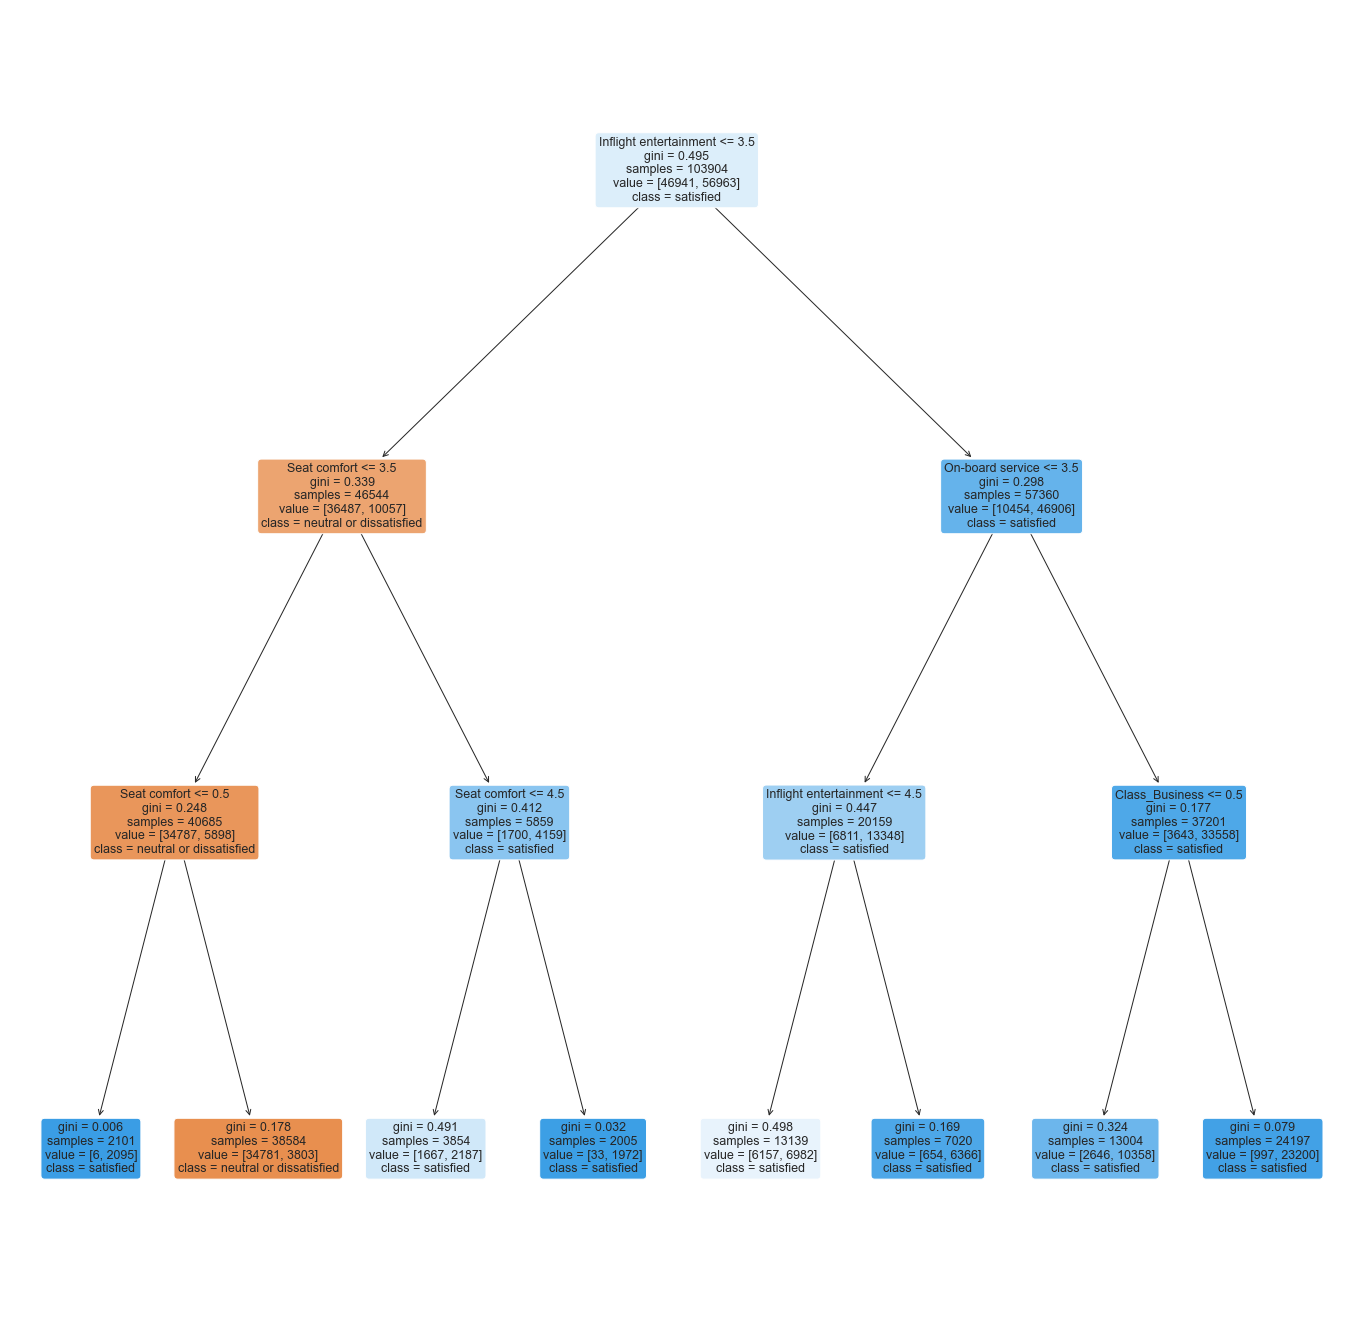

In [86]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["neutral or dissatisfied","satisfied"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Train Data
Accuracy  :	 0.8463678010471204

TPR Train :	 0.9332373646050945
TNR Train :	 0.7409514070854903

FPR Train :	 0.2590485929145097
FNR Train :	 0.06676263539490547


<AxesSubplot:>

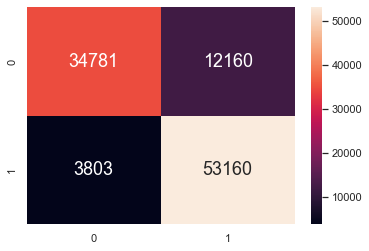

In [87]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8443948259932245

TPR Test :	 0.9350042480883602
TNR Test :	 0.7364157948025649

FPR Test :	 0.26358420519743503
FNR Test :	 0.06499575191163977


<AxesSubplot:>

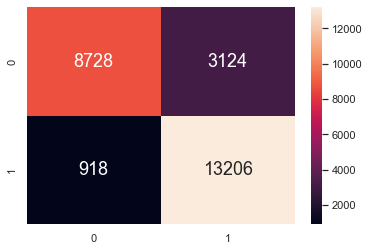

In [88]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Create a Model for Rating : Attempt 2 - resampling

In [89]:
# Upsample Bad to match Good
from sklearn.utils import resample

satisfactionBad = satisfactionData_ohe[satisfactionData_ohe.satisfaction_v2 == 'neutral or dissatisfied']
satisfactionGood = satisfactionData_ohe[satisfactionData_ohe.satisfaction_v2 == 'satisfied']
 
# Upsample the Bad samples
satisfactionBad_up = resample(satisfactionBad, 
                        replace=True,                     # sample with replacement
                        n_samples=satisfactionGood.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
satisfactionData_ohe_up = pd.concat([satisfactionGood, satisfactionBad_up])
 
# Check the ratio of the classes
satisfactionData_ohe_up['satisfaction_v2'].value_counts()

satisfied                  71087
neutral or dissatisfied    71087
Name: satisfaction_v2, dtype: int64

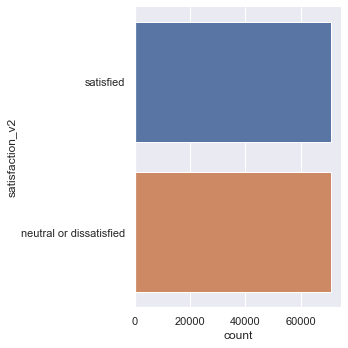

In [90]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'satisfaction_v2', data = satisfactionData_ohe_up, kind = "count")

In [91]:
# Confirm that the OHE is still in place
# and that the samples have now increased
satisfactionData_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142174 entries, 0 to 76070
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Seat comfort                       142174 non-null  int64  
 1   Departure/Arrival time convenient  142174 non-null  int64  
 2   Food and drink                     142174 non-null  int64  
 3   Inflight wifi service              142174 non-null  int64  
 4   Inflight entertainment             142174 non-null  int64  
 5   On-board service                   142174 non-null  int64  
 6   Leg room service                   142174 non-null  int64  
 7   Checkin service                    142174 non-null  int64  
 8   Cleanliness                        142174 non-null  int64  
 9   Class_Business                     142174 non-null  float64
 10  Class_Eco                          142174 non-null  float64
 11  Class_Eco Plus                     14217

[Text(669.6, 1174.1760000000002, 'Inflight entertainment <= 3.5\ngini = 0.5\nsamples = 113739\nvalue = [56791, 56948]\nclass = satisfied'),
 Text(334.8, 913.248, 'Seat comfort <= 3.5\ngini = 0.301\nsamples = 54176\nvalue = [44166, 10010]\nclass = neutral or dissatisfied'),
 Text(167.4, 652.3200000000002, 'Seat comfort <= 0.5\ngini = 0.215\nsamples = 47965\nvalue = [42097, 5868]\nclass = neutral or dissatisfied'),
 Text(83.7, 391.39200000000005, 'Food and drink <= 2.0\ngini = 0.013\nsamples = 2111\nvalue = [14, 2097]\nclass = satisfied'),
 Text(41.85, 130.46400000000017, 'gini = 0.005\nsamples = 2102\nvalue = [5, 2097]\nclass = satisfied'),
 Text(125.55000000000001, 130.46400000000017, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = neutral or dissatisfied'),
 Text(251.10000000000002, 391.39200000000005, 'Class_Business <= 0.5\ngini = 0.151\nsamples = 45854\nvalue = [42083, 3771]\nclass = neutral or dissatisfied'),
 Text(209.25, 130.46400000000017, 'gini = 0.079\nsamples = 31349\nvalu

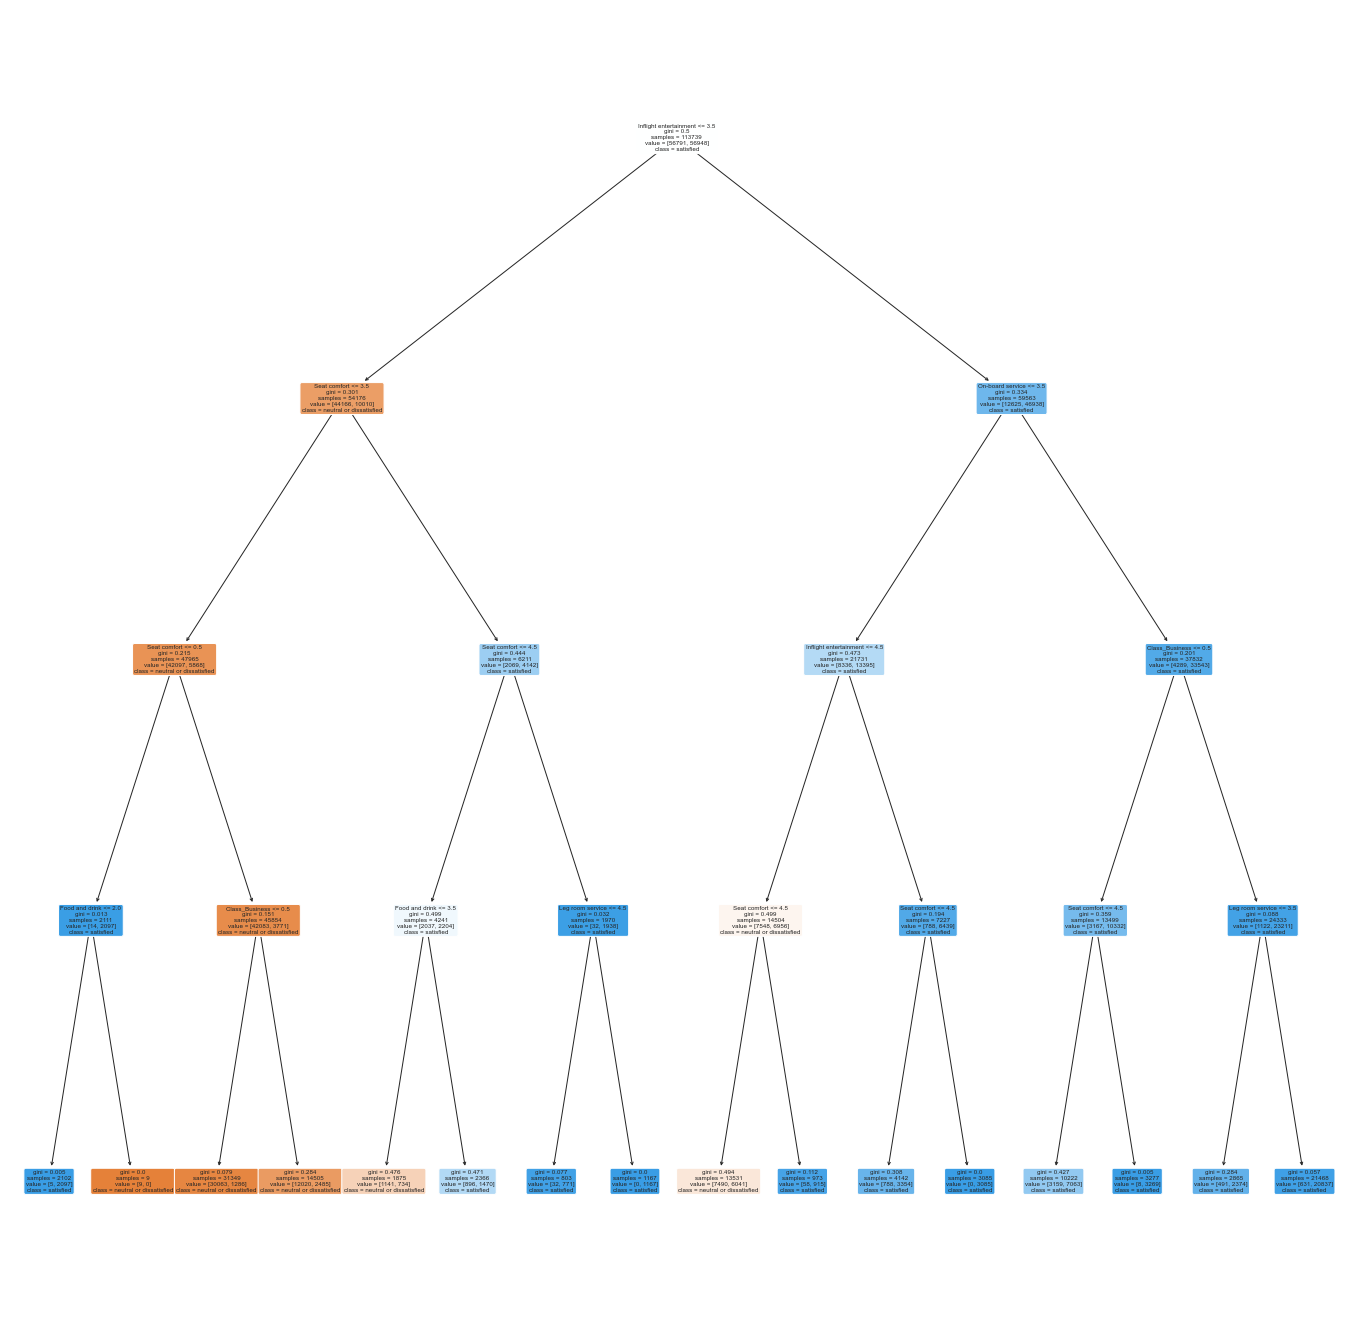

In [92]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["neutral or dissatisfied","satisfied"])

Train Data
Accuracy  :	 0.8539287315696463

TPR Train :	 0.8148135140830232
TNR Train :	 0.893152083956965

FPR Train :	 0.106847916043035
FNR Train :	 0.1851864859169769


<AxesSubplot:>

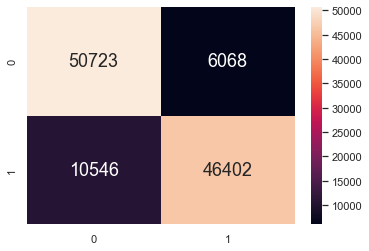

In [93]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8538069280815896

TPR Test :	 0.8196477827286229
TNR Test :	 0.8875909345271404

FPR Test :	 0.11240906547285955
FNR Test :	 0.18035221727137704


<AxesSubplot:>

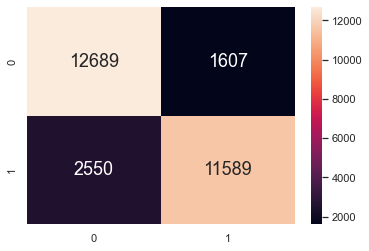

In [94]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})